![Python_logo](https://www.python.org/static/community_logos/python-logo-master-v3-TM.png)


   # **Cortex Game: Round1--Amount**

## Connecting the environment and loading the data 

***
### **Connect to SASPy**

**0- Connect to your Google Drive folder**

In [ ]:
my_folder = "/content/drive/MyDrive/RETO SAS"

from google.colab import drive
drive.mount('/content/drive')

# Change the following code to set your Drive folder
import os
os.chdir(my_folder)
!pwd

Mounted at /content/drive
/content/drive/MyDrive/RETO SAS


**1- Make sure that your Python version is 3.3 or higher as well as your Java version is 1.8.0_162 or higher**

In [ ]:
!echo "Python is at" $(which python)
!python --version

Python is at /usr/local/bin/python
Python 3.8.15


In [ ]:
!echo "Java is at" $(which java)
!/usr/bin/java -version

Java is at /usr/bin/java
openjdk version "11.0.17" 2022-10-18
OpenJDK Runtime Environment (build 11.0.17+8-post-Ubuntu-1ubuntu218.04)
OpenJDK 64-Bit Server VM (build 11.0.17+8-post-Ubuntu-1ubuntu218.04, mixed mode, sharing)


**2- Install SASPy**

In [ ]:
!pip install saspy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.9 MB 4.6 MB/s 
  Created wheel for saspy: filename=saspy-4.4.1-py3-none-any.whl size=9937304 sha256=38e5c1f642020eedf19ca67c3f12a7149213d354294d235bd3b55c906a3e750e
  Stored in directory: /root/.cache/pip/wheels/0a/f6/ab/f7173c8a824856c66f6fd50194bb8fd3ef93fb4f1824be8d0c
Successfully built saspy


**3- Create the configuration file "sascfg_personal.py"**
Please, check that your Home Region is correct, you can check it at [ODA-SAS](https://welcome.oda.sas.com/home)

In [ ]:
%%writefile sascfg_personal.py
SAS_config_names=['oda']
oda = {'java' : '/usr/bin/java',
#US Home Region 1
#'iomhost' : ['odaws01-usw2.oda.sas.com','odaws02-usw2.oda.sas.com','odaws03-usw2.oda.sas.com','odaws04-usw2.oda.sas.com'],
#US Home Region 2
'iomhost' : ['odaws01-usw2-2.oda.sas.com','odaws02-usw2-2.oda.sas.com'],
#European Home Region 1
#'iomhost' : ['odaws01-euw1.oda.sas.com','odaws02-euw1.oda.sas.com'],
#Asia Pacific Home Region 1
#'iomhost' : ['odaws01-apse1.oda.sas.com','odaws02-apse1.oda.sas.com'],
#Asia Pacific Home Region 2
#'iomhost' : ['odaws01-apse1-2.oda.sas.com','odaws02-apse1-2.oda.sas.com'],
'iomport' : 8591,
'authkey' : 'oda',
'encoding' : 'utf-8'
}

Overwriting sascfg_personal.py


**4- Create your .authinfo**

If there is no .authinfo file, you can create this

In [ ]:
#%%writefile .authinfo
#oda user A01734337@tec.mx password Soyunlider2.

Copy this file to home

In [ ]:
!cp .authinfo ~/.authinfo

**5- Establish Connection (Need to do this step each time you use SASPy)**

In [ ]:
import saspy
sas_session = saspy.SASsession(cfgfile="/content/drive/MyDrive/RETO SAS/sascfg_personal.py")
sas_session

Using SAS Config named: oda
SAS Connection established. Subprocess id is 409



Access Method         = IOM
SAS Config name       = oda
SAS Config file       = /content/drive/MyDrive/RETO SAS/sascfg_personal.py
WORK Path             = /saswork/SAS_workCB230001FD8C_odaws02-usw2-2.oda.sas.com/SAS_work228F0001FD8C_odaws02-usw2-2.oda.sas.com/
SAS Version           = 9.04.01M6P11072018
SASPy Version         = 4.4.1
Teach me SAS          = False
Batch                 = False
Results               = Pandas
SAS Session Encoding  = utf-8
Python Encoding value = utf-8
SAS process Pid value = 130444


***
### Connect to Cortex Data Sets

Load Cortex datasets from SAS Studio

In [ ]:
ps = sas_session.submit("""
    libname cortex '~/my_shared_file_links/u39842936/Cortex Data Sets';
    """)
print(ps["LOG"])


5                                                          The SAS System                    Thursday, December  1, 2022 11:29:00 PM

24         ods listing close;ods html5 (id=saspy_internal) file=_tomods1 options(bitmap_mode='inline') device=svg style=HTMLBlue;
24       ! ods graphics on / outputfmt=png;
25         
26         
27             libname cortex '~/my_shared_file_links/u39842936/Cortex Data Sets';
28         
29         
30         
31         ods html5 (id=saspy_internal) close;ods listing;
32         

6                                                          The SAS System                    Thursday, December  1, 2022 11:29:00 PM

33         


For local Jupyter

In [ ]:
#%%SAS sas_session
#libname cortex '~/my_shared_file_links/u39842936/Cortex Data Sets';

### Transform cloud SAS dataset to Python dataframe (pandas)


> **For reference**:

> 1. [Pandas library](https://pandas.pydata.org/docs/user_guide/index.html)

> 2. [sklearn.model_selection for data partition](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)


In [ ]:
import pandas as pd

data1 = sas_session.sasdata2dataframe(
table='hist',
libref='cortex'
)

data2 = sas_session.sasdata2dataframe(
table='target_rd1',
libref='cortex'
)

### Merge the Data

In [ ]:
data_merge = pd.merge(data1, data2, on=["ID"],how="right")
data_merge.sample(5)

#data_merge.head()


,ID,LastName,FirstName,Woman,Age,Salary,Education,City,SeniorList,NbActivities,...,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,GaveThisYear,AmtThisYear
257924,2257925.0,VANENGEN,BONNIE,1.0,21.0,7000.0,University / College,City,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
49681,2049682.0,CAIN,MARY,1.0,25.0,53900.0,University / College,City,2.0,2.0,...,1.0,2.0,2.0,2010.0,10.0,2000.0,1.0,40.0,0.0,0.0
71517,2071518.0,EKERN,CHARLES,0.0,65.0,35200.0,High School,Suburban,8.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
959523,2959524.0,PALMER,SPARKLE,1.0,68.0,28900.0,University / College,Rural,5.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,20.0,0.0,0.0
984598,2984599.0,SCHNEIDER,ALEXIS,1.0,55.0,124800.0,University / College,Rural,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0


## Business understanding

The problem to be solved in this case is to be able to know which donors are best to contact, so as to raise as much money as possible. 

## Data understanding

We have one million rows, which means there are one million possible donors.

In [ ]:
data_merge

,ID,LastName,FirstName,Woman,Age,Salary,Education,City,SeniorList,NbActivities,...,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,GaveThisYear,AmtThisYear
0,2000001.0,ROMMES,RODNEY,0.0,25.0,107200.0,University / College,City,2.0,0.0,...,1.0,2.0,2.0,1010.0,10.0,1000.0,0.0,0.0,0.0,0.0
1,2000002.0,RAMIREZ,SHARON,1.0,38.0,15800.0,High School,Rural,4.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
2,2000003.0,TSOSIE,KAREN,1.0,37.0,57400.0,University / College,Rural,5.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
3,2000004.0,LEE,MARY,1.0,78.0,23700.0,High School,Rural,3.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
4,2000005.0,HUMPHRES,ANGIE,1.0,34.0,71900.0,University / College,Rural,8.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2999996.0,SCHUBERT,FRANCES,1.0,29.0,15100.0,High School,Suburban,8.0,3.0,...,5.0,1.0,5.0,20.0,20.0,20.0,0.0,0.0,0.0,0.0
999996,2999997.0,LUGGE,MARY,1.0,22.0,7000.0,High School,Suburban,10.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
999997,2999998.0,ROY,REGINALD,0.0,17.0,1000.0,High School,City,10.0,1.0,...,1.0,1.0,1.0,20.0,20.0,20.0,0.0,0.0,0.0,0.0
999998,2999999.0,LIBERTI,PAMELA,1.0,32.0,43900.0,University / College,Rural,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0


The main characteristics of the data set are as follows:

In [ ]:
data_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 21 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   ID            1000000 non-null  float64
 1   LastName      999977 non-null   object 
 2   FirstName     999996 non-null   object 
 3   Woman         1000000 non-null  float64
 4   Age           1000000 non-null  float64
 5   Salary        1000000 non-null  float64
 6   Education     1000000 non-null  object 
 7   City          1000000 non-null  object 
 8   SeniorList    1000000 non-null  float64
 9   NbActivities  1000000 non-null  float64
 10  Referrals     1000000 non-null  float64
 11  Recency       336334 non-null   float64
 12  Frequency     336334 non-null   float64
 13  Seniority     336334 non-null   float64
 14  TotalGift     336334 non-null   float64
 15  MinGift       336334 non-null   float64
 16  MaxGift       336334 non-null   float64
 17  GaveLastYear  1000000 non-nu

In [ ]:
data_merge.describe()

,ID,Woman,Age,Salary,SeniorList,NbActivities,Referrals,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,GaveThisYear,AmtThisYear
count,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,336334.000000,336334.000000,336334.000000,336334.000000,336334.000000,336334.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,2.500000e+06,0.516936,46.366170,65531.654000,4.582967,0.561413,0.560556,3.039636,1.666882,4.474148,104.454055,43.130251,85.897932,0.122101,7.673015,0.122232,7.741080
std,2.886753e+05,0.499713,18.945324,61051.122343,3.325844,0.996803,1.054027,2.120722,1.052090,2.588119,303.760477,150.249476,283.581066,0.327403,82.224854,0.327554,83.110552
min,2.000001e+06,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,10.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000
25%,2.250001e+06,0.000000,30.000000,20700.000000,2.000000,0.000000,0.000000,1.000000,1.000000,2.000000,20.000000,15.000000,20.000000,0.000000,0.000000,0.000000,0.000000
50%,2.500000e+06,1.000000,46.000000,44000.000000,4.000000,0.000000,0.000000,2.000000,1.000000,4.000000,40.000000,20.000000,30.000000,0.000000,0.000000,0.000000,0.000000
75%,2.750000e+06,1.000000,61.000000,91200.000000,7.000000,1.000000,1.000000,4.000000,2.000000,6.000000,90.000000,30.000000,75.000000,0.000000,0.000000,0.000000,0.000000
max,3.000000e+06,1.000000,90.000000,250000.000000,10.000000,10.000000,16.000000,10.000000,10.000000,10.000000,15150.000000,10000.000000,10000.000000,1.000000,10000.000000,1.000000,10000.000000


There are 21 columns, we are going to explore the meaning of each one and the data type.

* ID: Member number (unique ID) -> Categoric
* LastName: Last Name -> Categoric
* FirstName: First Name ->
* Woman: Sex (1=woman, 0=man)
* Age: Age (years)
* Salary: Annual salary in USD
* Education: Highest education level
* City: Type of neighborhood
* SeniorList: Seniority for being on the VIP list
* NbActivities:Number of participations to annual meeting
* Referrals: Number of referrals
* Recency: Number of years since last donation 
* Frequency: Number of donations
* Seniority: Number of years since first donation
* TotalGift: Total donation amount since a member
* MinGift: Minimum donation amount since a member
* MaxGift: Maximum donation amount since a member
* *GaveLastYear*: Whether or not the individual gave last year
* *AmtLastYear*: Donation amount given last year
* *GaveThisYear*: Whether or not the individual gave this year
* *AmtThisYear*: Donation amount given this year



There are six columns with 663666 null values (66% per column). If we delete that columns we could lost important information, so we have to fill this columns with rasonable values. So we need to explore with more details the meaning of this variables. 

### Duplicated values

There are any row duplicated 

In [ ]:
data_merge.duplicated().sum()

0

### Correlation matrix

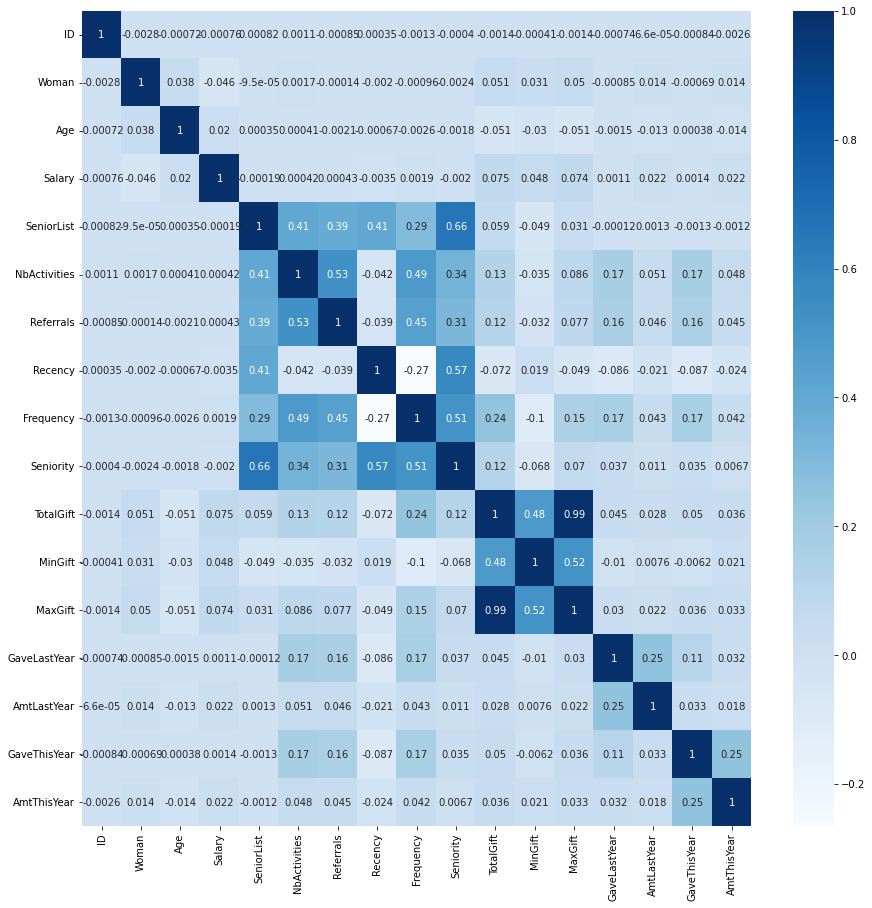

In [ ]:
import seaborn as sb
import matplotlib.pyplot as plt
corr = data_merge.corr()
fig, ax = plt.subplots(figsize=(15,15))  
sb.heatmap(corr, cmap="Blues", annot=True)

## Data preparation

### Treat Missing Values

> Please be aware that deleting all missing values can induce a selection bias. 
Some missing values are very informative. For example, when MinGift is missing, it means that the donor never gave in the past 10 years (leading to but excluding last year). Instead of deleting this information, replacing it by 0 is more appropriate!

> A good understanding of the business case and the data can help you come up with more appropriate strategies to deal with missing values.


In [ ]:
# In this case, we are replacing MinGift by 0.
# You can do the same for what you think is reasonable for dealing with the other variables.

data_merge[['MinGift']] = data_merge[['MinGift']].fillna(value=0) 

#The first change that I'm gonna do, is replace by 0, all the columns with null values 
data_merge[['Frequency']] = data_merge[['Frequency']].fillna(value=0) 
data_merge[['TotalGift']] = data_merge[['TotalGift']].fillna(value=0) 
data_merge[['MaxGift']] = data_merge[['MaxGift']].fillna(value=0) 


data_merge[['Recency']] = data_merge[['Recency']].fillna(value=20) 
data_merge[['Seniority']] = data_merge[['Seniority']].fillna(value=20) 

data_merge.sample(3)

,ID,LastName,FirstName,Woman,Age,Salary,Education,City,SeniorList,NbActivities,...,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,GaveThisYear,AmtThisYear
577893,2577894.0,LINDSEY,MURIEL,1.0,57.0,43500.0,University / College,Downtown,5.0,1.0,...,2.0,1.0,2.0,10.0,10.0,10.0,0.0,0.0,0.0,0.0
496373,2496374.0,CROLL,BETTY,1.0,43.0,9900.0,University / College,Rural,2.0,0.0,...,20.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0
939024,2939025.0,RODRIGUEZ,MARY,1.0,61.0,76800.0,University / College,Suburban,3.0,0.0,...,20.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Data Partition

In [ ]:
# The code below is an illustration on how to sample data on train and validation samples.
# You could use another library or a built-in function to perform sampling.

from sklearn.model_selection import train_test_split
train, validation = train_test_split(data_merge, test_size=0.4, random_state=12345) 

#train.head()
train.sample(2)

,ID,LastName,FirstName,Woman,Age,Salary,Education,City,SeniorList,NbActivities,...,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,GaveThisYear,AmtThisYear
101269,2101270.0,MCCOY,LEE,0.0,59.0,46500.0,High School,Downtown,5.0,0.0,...,20.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
104097,2104098.0,NEER,DEBORAH,1.0,57.0,35600.0,High School,Suburban,5.0,1.0,...,4.0,1.0,4.0,70.0,70.0,70.0,0.0,0.0,0.0,0.0


## Modeling



***

### **Linear Regression Model**


In [ ]:
from sklearn import linear_model

#comment: it's numpy array
X_train = train[['Age', 'Salary','MinGift','AmtLastYear','Woman', 'NbActivities',"TotalGift","Frequency","MaxGift","Seniority","GaveLastYear"]]
Y_train = train['AmtThisYear']
X_valid = validation[['Age', 'Salary','MinGift','AmtLastYear','Woman', 'NbActivities',"TotalGift","Frequency","MaxGift","Seniority","GaveLastYear"]] 
Y_valid = validation['AmtThisYear']

regr = linear_model.LinearRegression()
regr.fit(X_train,Y_train)
regr_predict=regr.predict(X_valid)

In [ ]:
#you can change the criteria

import numpy as np
from sklearn import metrics
#MAE
print(metrics.mean_absolute_error(Y_valid,regr_predict))
#MSE
print(metrics.mean_squared_error(Y_valid,regr_predict))
#RMSE
print(np.sqrt(metrics.mean_squared_error(Y_valid,regr_predict)))

13.159647911283015
7601.329818616341
87.18560557005004


### **Regression Tree Model**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

X_train = train[['Age', 'Salary','MinGift','AmtLastYear','Woman', 'NbActivities',"TotalGift","Frequency","MaxGift","Seniority"]] 
Y_train = train['AmtThisYear']
X_valid = validation[['Age', 'Salary','MinGift','AmtLastYear','Woman', 'NbActivities',"TotalGift","Frequency","MaxGift","Seniority"]] 
Y_valid = validation['AmtThisYear']

DT_model = DecisionTreeRegressor(max_depth=5).fit(X_train,Y_train)

DT_predict = DT_model.predict(X_valid) #Predictions on Testing data


In [ ]:
#you can change the criteria
#MAE
print(metrics.mean_absolute_error(Y_valid,DT_predict))
#MSE
print(metrics.mean_squared_error(Y_valid,DT_predict))
#RMSE
print(np.sqrt(metrics.mean_squared_error(Y_valid,DT_predict)))

13.259562611265869
7606.073621449043
87.21280652203002


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

X_train = train[['Age', 'Salary','MinGift','AmtLastYear','Woman', 'NbActivities',"TotalGift","Frequency","MaxGift","Seniority"]] 
Y_train = train['AmtThisYear']
X_valid = validation[['Age', 'Salary','MinGift', 'AmtLastYear','Woman', 'NbActivities',"TotalGift","Frequency","MaxGift","Seniority "]] 
Y_valid = validation['AmtThisYear']

DT_model = RandomForestRegressor().fit(X_train,Y_train)

DT_predict = DT_model.predict(X_valid) #Predictions on Testing data


In [ ]:
#you can change the criteria
#MAE
print(metrics.mean_absolute_error(Y_valid,DT_predict))
#MSE
print(metrics.mean_squared_error(Y_valid,DT_predict))
#RMSE
print(np.sqrt(metrics.mean_squared_error(Y_valid,DT_predict)))

14.905545771704837
8536.650293878694
92.39399490160979


### Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge


X_train = train[['Age', 'Salary','MinGift','AmtLastYear','Woman', 'NbActivities',"TotalGift","Frequency","MaxGift"]] 
Y_train = train['AmtThisYear']
X_valid = validation[['Age', 'Salary','MinGift', 'AmtLastYear','Woman', 'NbActivities',"TotalGift","Frequency","MaxGift"]] 
Y_valid = validation['AmtThisYear']

DT_model = Ridge(alpha=0.5).fit(X_train,Y_train)

DT_predict = DT_model.predict(X_valid) #Predictions on Testing data

In [ ]:
#you can change the criteria
#MAE
print(metrics.mean_absolute_error(Y_valid,DT_predict))
#MSE
print(metrics.mean_squared_error(Y_valid,DT_predict))
#RMSE
print(np.sqrt(metrics.mean_squared_error(Y_valid,DT_predict)))

13.21830434204319
7602.820732880817
87.19415538257606


## Scoring New Data

### Prepare data for scoring

In [ ]:
data3 = sas_session.sasdata2dataframe(
table='score_rd1',
libref='cortex'
)
data4 = sas_session.sasdata2dataframe(
table='score',
libref='cortex'
)

 ### Score new data based on your champion model
 
> Pick your champion model from previous steps and use it to predict next year donations. 
 
> In this case, the linear regression model performed better than the regression tree based on the MSE criterion.

In [ ]:
scoring_data = pd.merge(data3, data4, on=["ID"],how="right")

# Perform the same strategy for handling missing values for the score dataset.
# In this case, we will only replace missing values of the MinGift variable.

scoring_data[['MinGift']] = scoring_data[['MinGift']].fillna(value=0) 
scoring_data[['Frequency']] = scoring_data[['Frequency']].fillna(value=0) 
scoring_data[['TotalGift']] = scoring_data[['TotalGift']].fillna(value=0) 
scoring_data[['MaxGift']] = scoring_data[['MaxGift']].fillna(value=0) 
scoring_data[['Recency']] = scoring_data[['Recency']].fillna(value=20) 
scoring_data[['Seniority']] = scoring_data[['Seniority']].fillna(value=20) 

scoring_data.head()

,ID,GaveLastYear,AmtLastYear,LastName,FirstName,Woman,Age,Salary,Education,City,SeniorList,NbActivities,Referrals,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift
0,2000001.0,0.0,0.0,ROMMES,RODNEY,0.0,25.0,107200.0,University / College,City,2.0,0.0,0.0,1.0,2.0,2.0,1010.0,10.0,1000.0
1,2000002.0,0.0,0.0,RAMIREZ,SHARON,1.0,38.0,15800.0,High School,Rural,4.0,1.0,1.0,20.0,0.0,20.0,0.0,0.0,0.0
2,2000003.0,0.0,0.0,TSOSIE,KAREN,1.0,37.0,57400.0,University / College,Rural,5.0,0.0,0.0,20.0,0.0,20.0,0.0,0.0,0.0
3,2000004.0,0.0,0.0,LEE,MARY,1.0,78.0,23700.0,High School,Rural,3.0,0.0,0.0,20.0,0.0,20.0,0.0,0.0,0.0
4,2000005.0,0.0,0.0,HUMPHRES,ANGIE,1.0,34.0,71900.0,University / College,Rural,8.0,0.0,0.0,20.0,0.0,20.0,0.0,0.0,0.0


In [ ]:
scoring_data.isna().sum()

ID               0
GaveLastYear     0
AmtLastYear      0
LastName        23
FirstName        4
Woman            0
Age              0
Salary           0
Education        0
City             0
SeniorList       0
NbActivities     0
Referrals        0
Recency          0
Frequency        0
Seniority        0
TotalGift        0
MinGift          0
MaxGift          0
dtype: int64

In [ ]:
# In this case, based on MSE (Mean Squared Error) criterion,
# the linear regression model performed better than the regression tree.

X = scoring_data[['Age', 'Salary','MinGift','AmtLastYear','Woman', 'NbActivities',"TotalGift","Frequency","MaxGift","Seniority","GaveLastYear"]] 
regr_predict_end=regr.predict(X)

scoring_data['Prediction'] = regr_predict_end
scoring_data.sort_values(by=['Prediction'], inplace=True,ascending=False)
scoring_data.head()

,ID,GaveLastYear,AmtLastYear,LastName,FirstName,Woman,Age,Salary,Education,City,SeniorList,NbActivities,Referrals,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,Prediction
411095,2411096.0,0.0,0.0,PATTEN,BEVERLY,1.0,33.0,203300.0,High School,City,9.0,1.0,2.0,0.0,4.0,9.0,15650.0,150.0,10000.0,172.104359
449487,2449488.0,1.0,150.0,BURKE,GRACE,1.0,28.0,238900.0,University / College,Suburban,10.0,6.0,2.0,0.0,6.0,10.0,6240.0,20.0,2000.0,139.664690
920574,2920575.0,1.0,20.0,HAWTHORN,ANNA,1.0,25.0,0.0,High School,City,8.0,2.0,3.0,1.0,3.0,4.0,13500.0,500.0,10000.0,127.643968
420890,2420891.0,1.0,9000.0,BEIL,MARGARET,1.0,37.0,104200.0,Elementary,Downtown,10.0,5.0,5.0,7.0,1.0,7.0,7000.0,7000.0,7000.0,123.186742
2442,2002443.0,1.0,25.0,AVINA,TRACY,1.0,37.0,65600.0,University / College,Downtown,10.0,7.0,4.0,0.0,10.0,10.0,7840.0,10.0,5000.0,120.315706


In [ ]:
scoring_data

,ID,GaveLastYear,AmtLastYear,LastName,FirstName,Woman,Age,Salary,Education,City,SeniorList,NbActivities,Referrals,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,Prediction
420890,2420891.0,1.0,9000.0,BEIL,MARGARET,1.0,37.0,104200.0,Elementary,Downtown,10.0,5.0,5.0,7.0,1.0,7.0,7000.0,7000.0,7000.0,174.160551
132410,2132411.0,1.0,9000.0,ASANTE,SOLEDAD,1.0,36.0,180500.0,High School,Suburban,7.0,4.0,3.0,2.0,4.0,7.0,5530.0,10.0,5000.0,163.134720
954313,2954314.0,1.0,10000.0,SANCHEZ,JADA,1.0,37.0,222700.0,High School,Suburban,10.0,2.0,1.0,1.0,4.0,9.0,95.0,10.0,40.0,148.595992
167697,2167698.0,1.0,10000.0,ALEXANDER,AMELIA,1.0,31.0,90900.0,University / College,Suburban,7.0,1.0,3.0,2.0,4.0,5.0,1090.0,20.0,1000.0,146.081497
631673,2631674.0,1.0,10000.0,KOPPENHEFFER,JENNIFER,1.0,34.0,186500.0,University / College,City,9.0,3.0,1.0,0.0,1.0,0.0,500.0,500.0,500.0,145.687469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414494,2414495.0,0.0,0.0,GRIFFIN,BENJAMIN,0.0,90.0,1200.0,High School,City,3.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,0.0,-1.039051
243721,2243722.0,0.0,0.0,SON,JAMES,0.0,90.0,1100.0,University / College,Suburban,6.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,0.0,-1.041999
971780,2971781.0,0.0,0.0,RODRIGUEZ,JAMES,0.0,90.0,1100.0,Elementary,Suburban,4.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,0.0,-1.041999
669143,2669144.0,0.0,0.0,MATSUOKA,ANTONIO,0.0,90.0,1000.0,High School,Suburban,3.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,0.0,-1.044946


## Exporting Results to a CSV File

In [ ]:
Result= scoring_data[['ID','Prediction']]
#Result.to_csv('Round1_Output.csv', index=False)

In [ ]:
# Define your cutoff and choose a number of rows to submit to the leaderboard

NB = 170000
submission = Result.head(NB)
submission.to_csv('Round1.csv', index=False)

In [ ]:
submission

,ID,Prediction
411095,2411096.0,172.104359
449487,2449488.0,139.664690
920574,2920575.0,127.643968
420890,2420891.0,123.186742
2442,2002443.0,120.315706
...,...,...
982588,2982589.0,12.518111
515833,2515834.0,12.518075
240726,2240727.0,12.518048
220067,2220068.0,12.518044


In [ ]:
# Reminder: Please note that you need only one column (the list of donors' IDs) to submit to the leaderboard.


In [ ]:
!head Round1\ Output.csv

ID,Prediction
2420891.0,203.53100264852912
2631674.0,157.07423550309795
2334250.0,154.56589904654052
2954314.0,149.93662884564222
2416111.0,149.59033329198328
2100799.0,145.1098616263633
2094131.0,144.0934294771176
2132411.0,143.607439950489
2265980.0,143.60338124946452
